# Advanced Regression Assignment

# Step1 : Cleaning the Data

In [1]:
#Import Necessary Libraries and importing the Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error 
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)

In [3]:
df = pd.read_csv(r"train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Info and Describe to check the model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
round(100 * df.isnull().sum()/len(df),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [6]:
df.shape

(1460, 81)

In [7]:
# Checking the number of columns with Null/NA values sorted.
null= round(100 * df.isnull().sum()/len(df))
null=null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          100.0
MiscFeature      96.0
Alley            94.0
Fence            81.0
FireplaceQu      47.0
LotFrontage      18.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
BsmtQual          3.0
MasVnrArea        1.0
MasVnrType        1.0
dtype: float64

In [8]:
# drop columns with null greater than 90%.Also,we will drop ID as its not necessary
df =df.drop(['PoolQC','MiscFeature','Alley','Id'], axis=1)
df.shape

(1460, 77)

In [9]:
null= round(100 * df.isnull().sum()/len(df))
null=null[null>0]
null.sort_values(inplace=True, ascending=False)
null

Fence           81.0
FireplaceQu     47.0
LotFrontage     18.0
GarageType       6.0
GarageYrBlt      6.0
GarageFinish     6.0
GarageQual       6.0
GarageCond       6.0
BsmtQual         3.0
BsmtCond         3.0
BsmtExposure     3.0
BsmtFinType1     3.0
BsmtFinType2     3.0
MasVnrType       1.0
MasVnrArea       1.0
dtype: float64

In [10]:
# We need to impute the other columns. Since we know Null/NA values in column are due to the feature not being available
# we will first convert the Null/NA values to None values. Then depending on the spread/variance of data we will decide if need
# to drop the columns or not.

val =['Fence','FireplaceQu','LotFrontage','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','MasVnrArea']

In [11]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
#In Above step we have imputed categorical variables with Null/NA to None.Now we will impute numerical variables.
#for numerical variables,since the columns look promising,we will impute them with median values of column
val = ['LotFrontage','GarageYrBlt','MasVnrArea']
for i in val:
    df[i].fillna(df[i].median(),inplace=True)

In [13]:
df.LotFrontage.describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
#Finally no columns has null/NA values. We can move to next step
null= round(100 * df.isnull().sum()/len(df))
null=null[null>0]
null.sort_values(inplace=True, ascending=False)
null

Fence           81.0
FireplaceQu     47.0
GarageType       6.0
GarageFinish     6.0
GarageQual       6.0
GarageCond       6.0
BsmtQual         3.0
BsmtCond         3.0
BsmtExposure     3.0
BsmtFinType1     3.0
BsmtFinType2     3.0
MasVnrType       1.0
dtype: float64

In [15]:
round(100 * df.isnull().sum()/len(df))

MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
Street            0.0
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
YearBuilt         0.0
YearRemodAdd      0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        1.0
MasVnrArea        0.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinSF1        0.0
BsmtFinType2      3.0
BsmtFinSF2        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
Heating           0.0
HeatingQC         0.0
CentralAir        0.0
Electrical        0.0
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFinSF      0.0
GrLivArea         0.0
BsmtFullBa

# Step 2 : Exploratory Data Analysis(EDA)

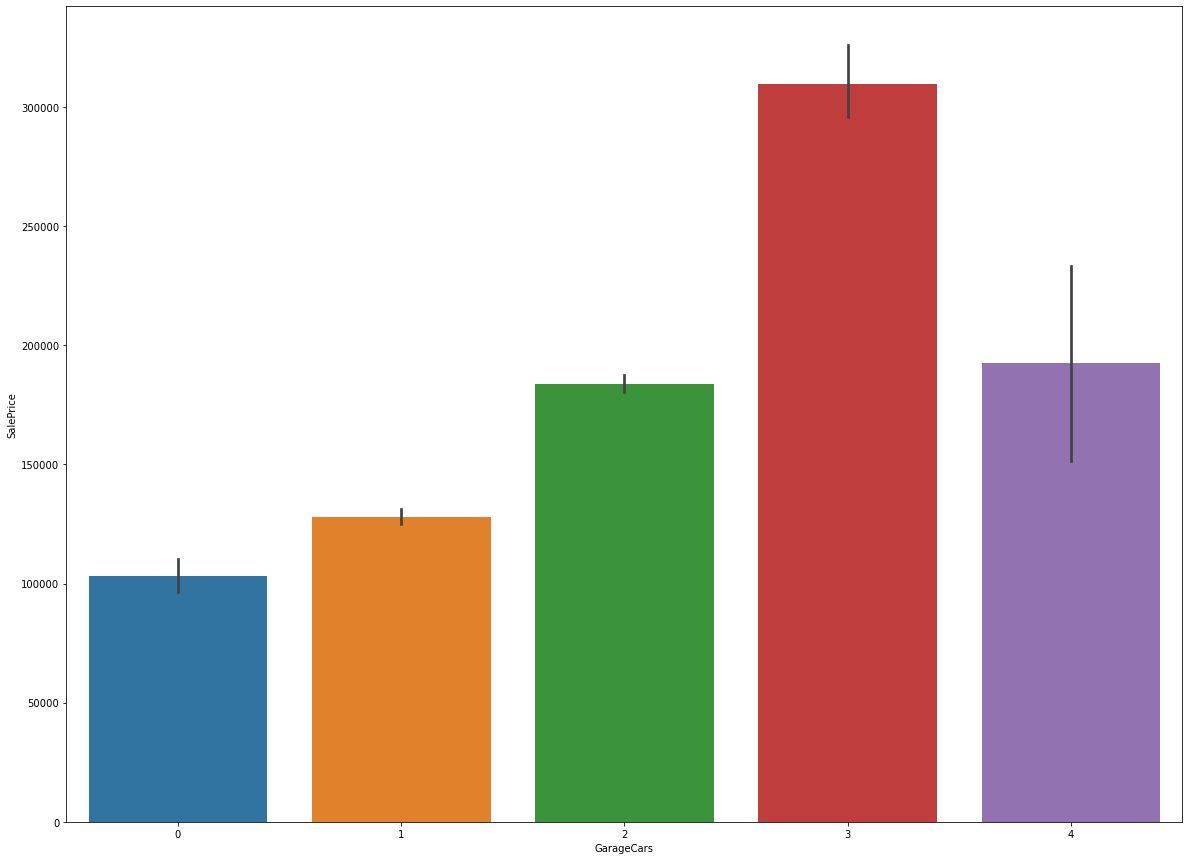

In [16]:
# BarGraph to see how the Target Variable Saleprice is chaanging to different values of predictor variables
plt.figure(figsize=(20,15))
sns.barplot(data = df, x='GarageCars',y='SalePrice')
plt.show()

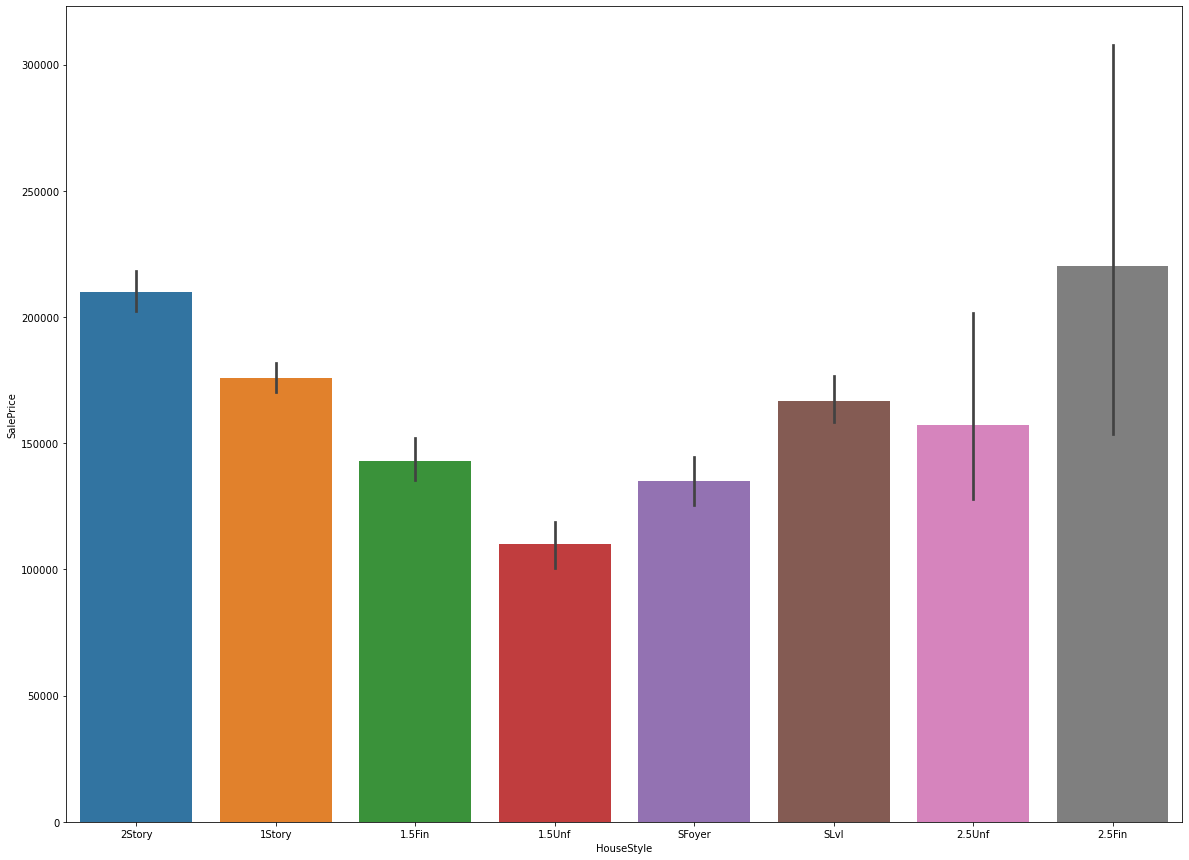

In [17]:
plt.figure(figsize=(20,15))
sns.barplot(data = df, x='HouseStyle',y='SalePrice')
plt.show()

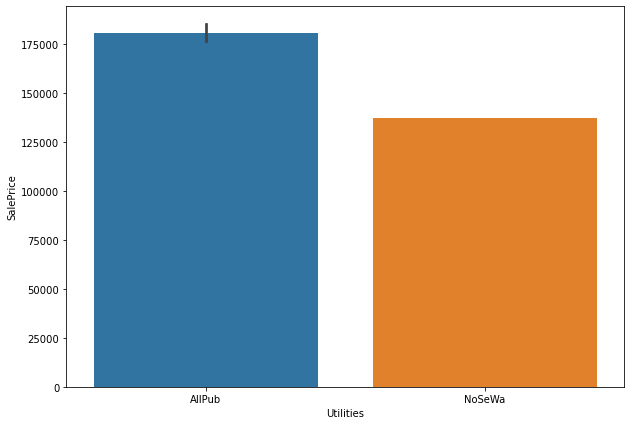

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(data = df, x='Utilities',y='SalePrice')
plt.show()

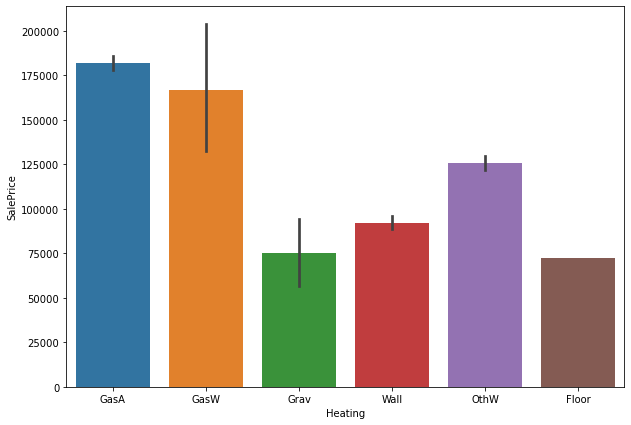

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(data = df, x='Heating',y='SalePrice')
plt.show()

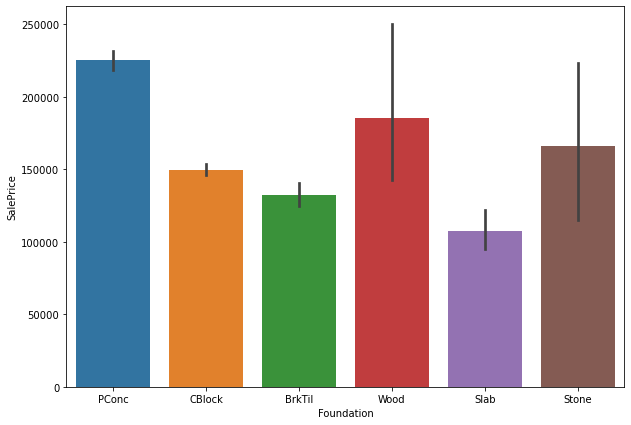

In [20]:
plt.figure(figsize=(10,7))
sns.barplot(data = df, x='Foundation',y='SalePrice')
plt.show()

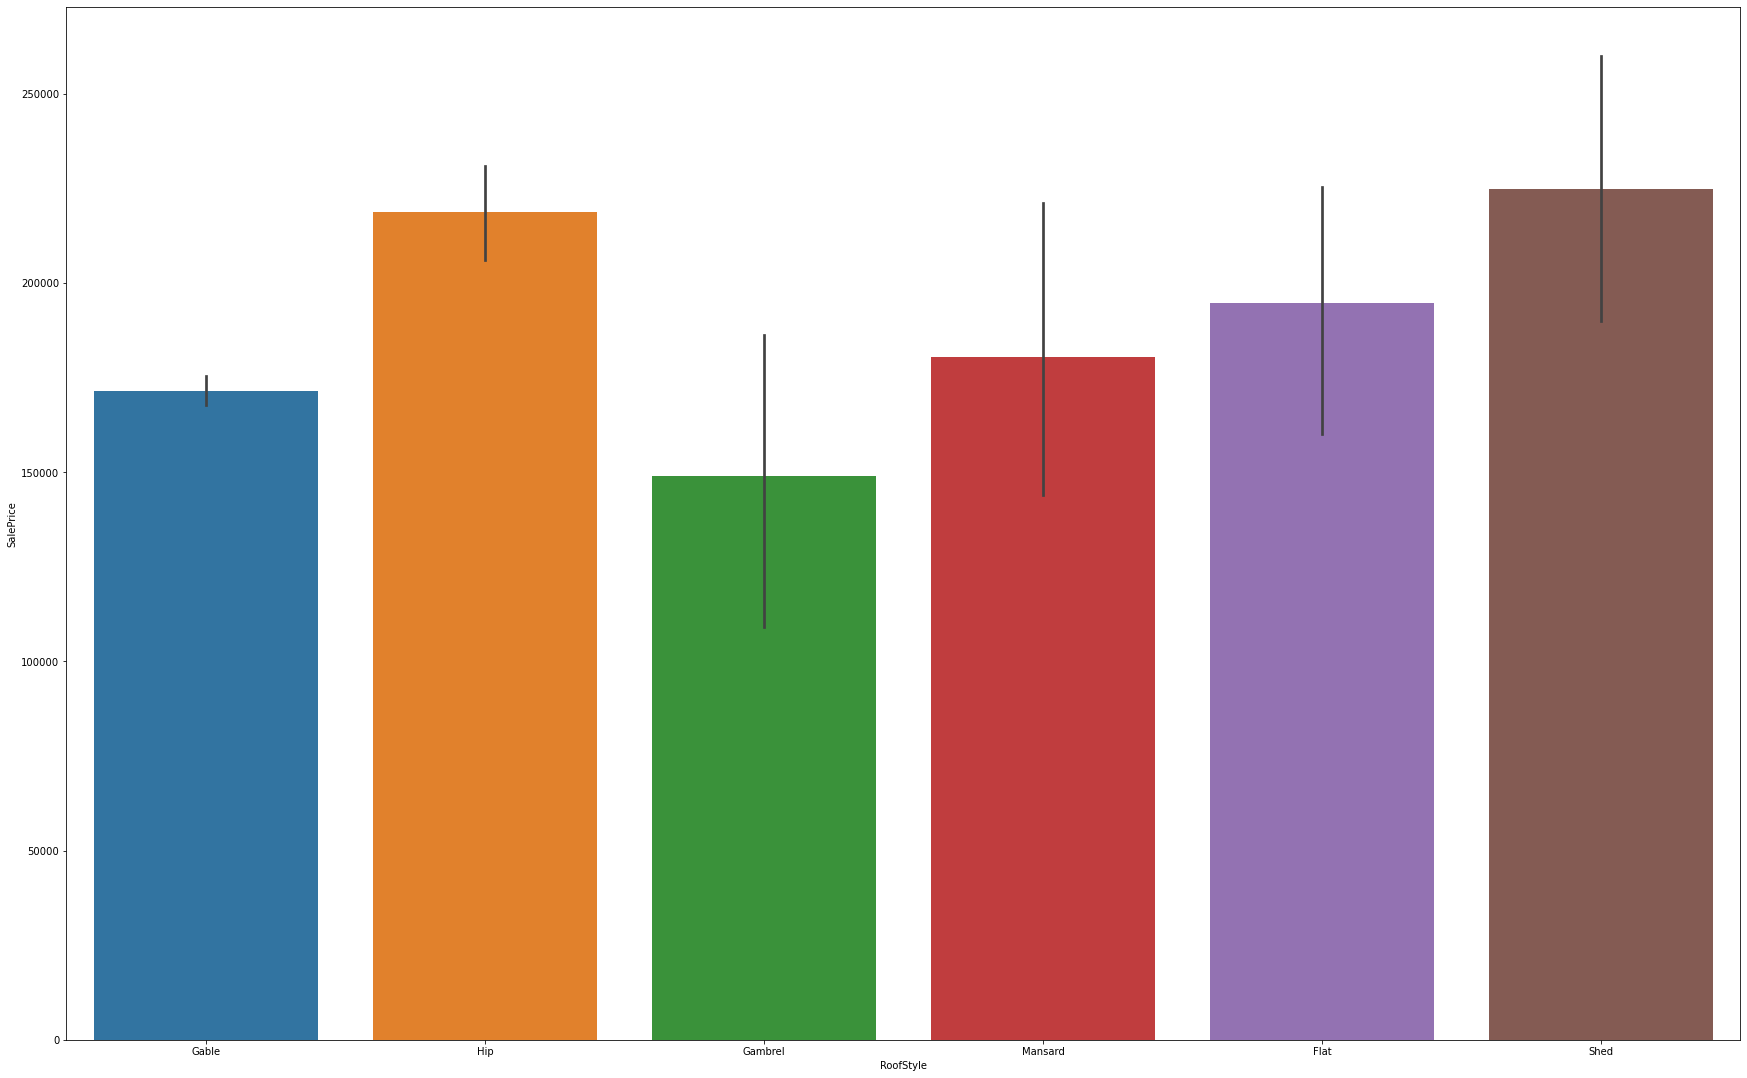

In [21]:
plt.figure(figsize=(30,19))
sns.barplot(data = df, x='RoofStyle',y='SalePrice')
plt.show()

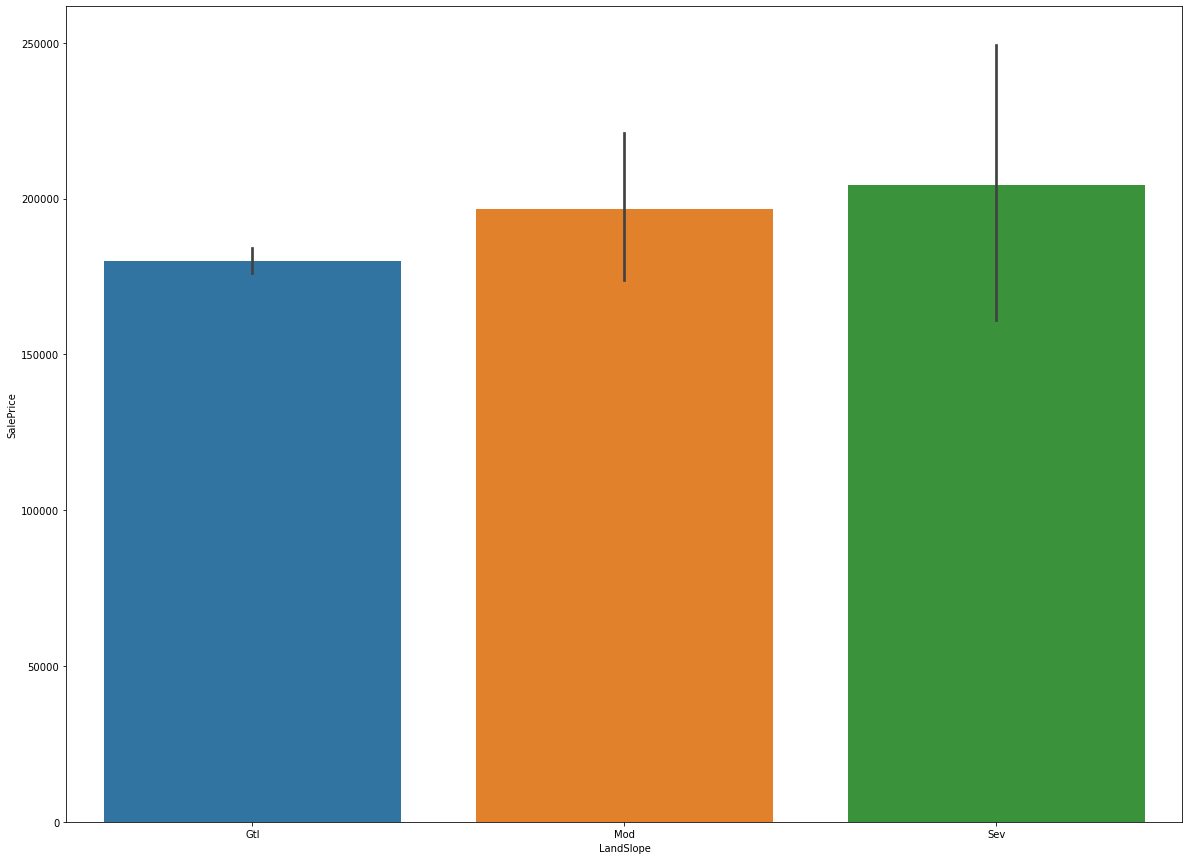

In [22]:
plt.figure(figsize=(20,15))
sns.barplot(data = df, x='LandSlope',y='SalePrice')
plt.show()

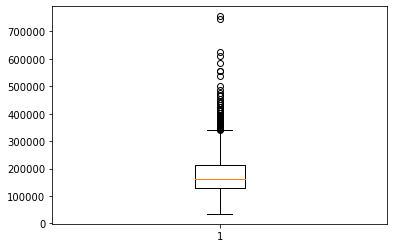

In [23]:
# Boxplot to check Spread of the column
plt.boxplot(x=df['SalePrice'])
plt.show()

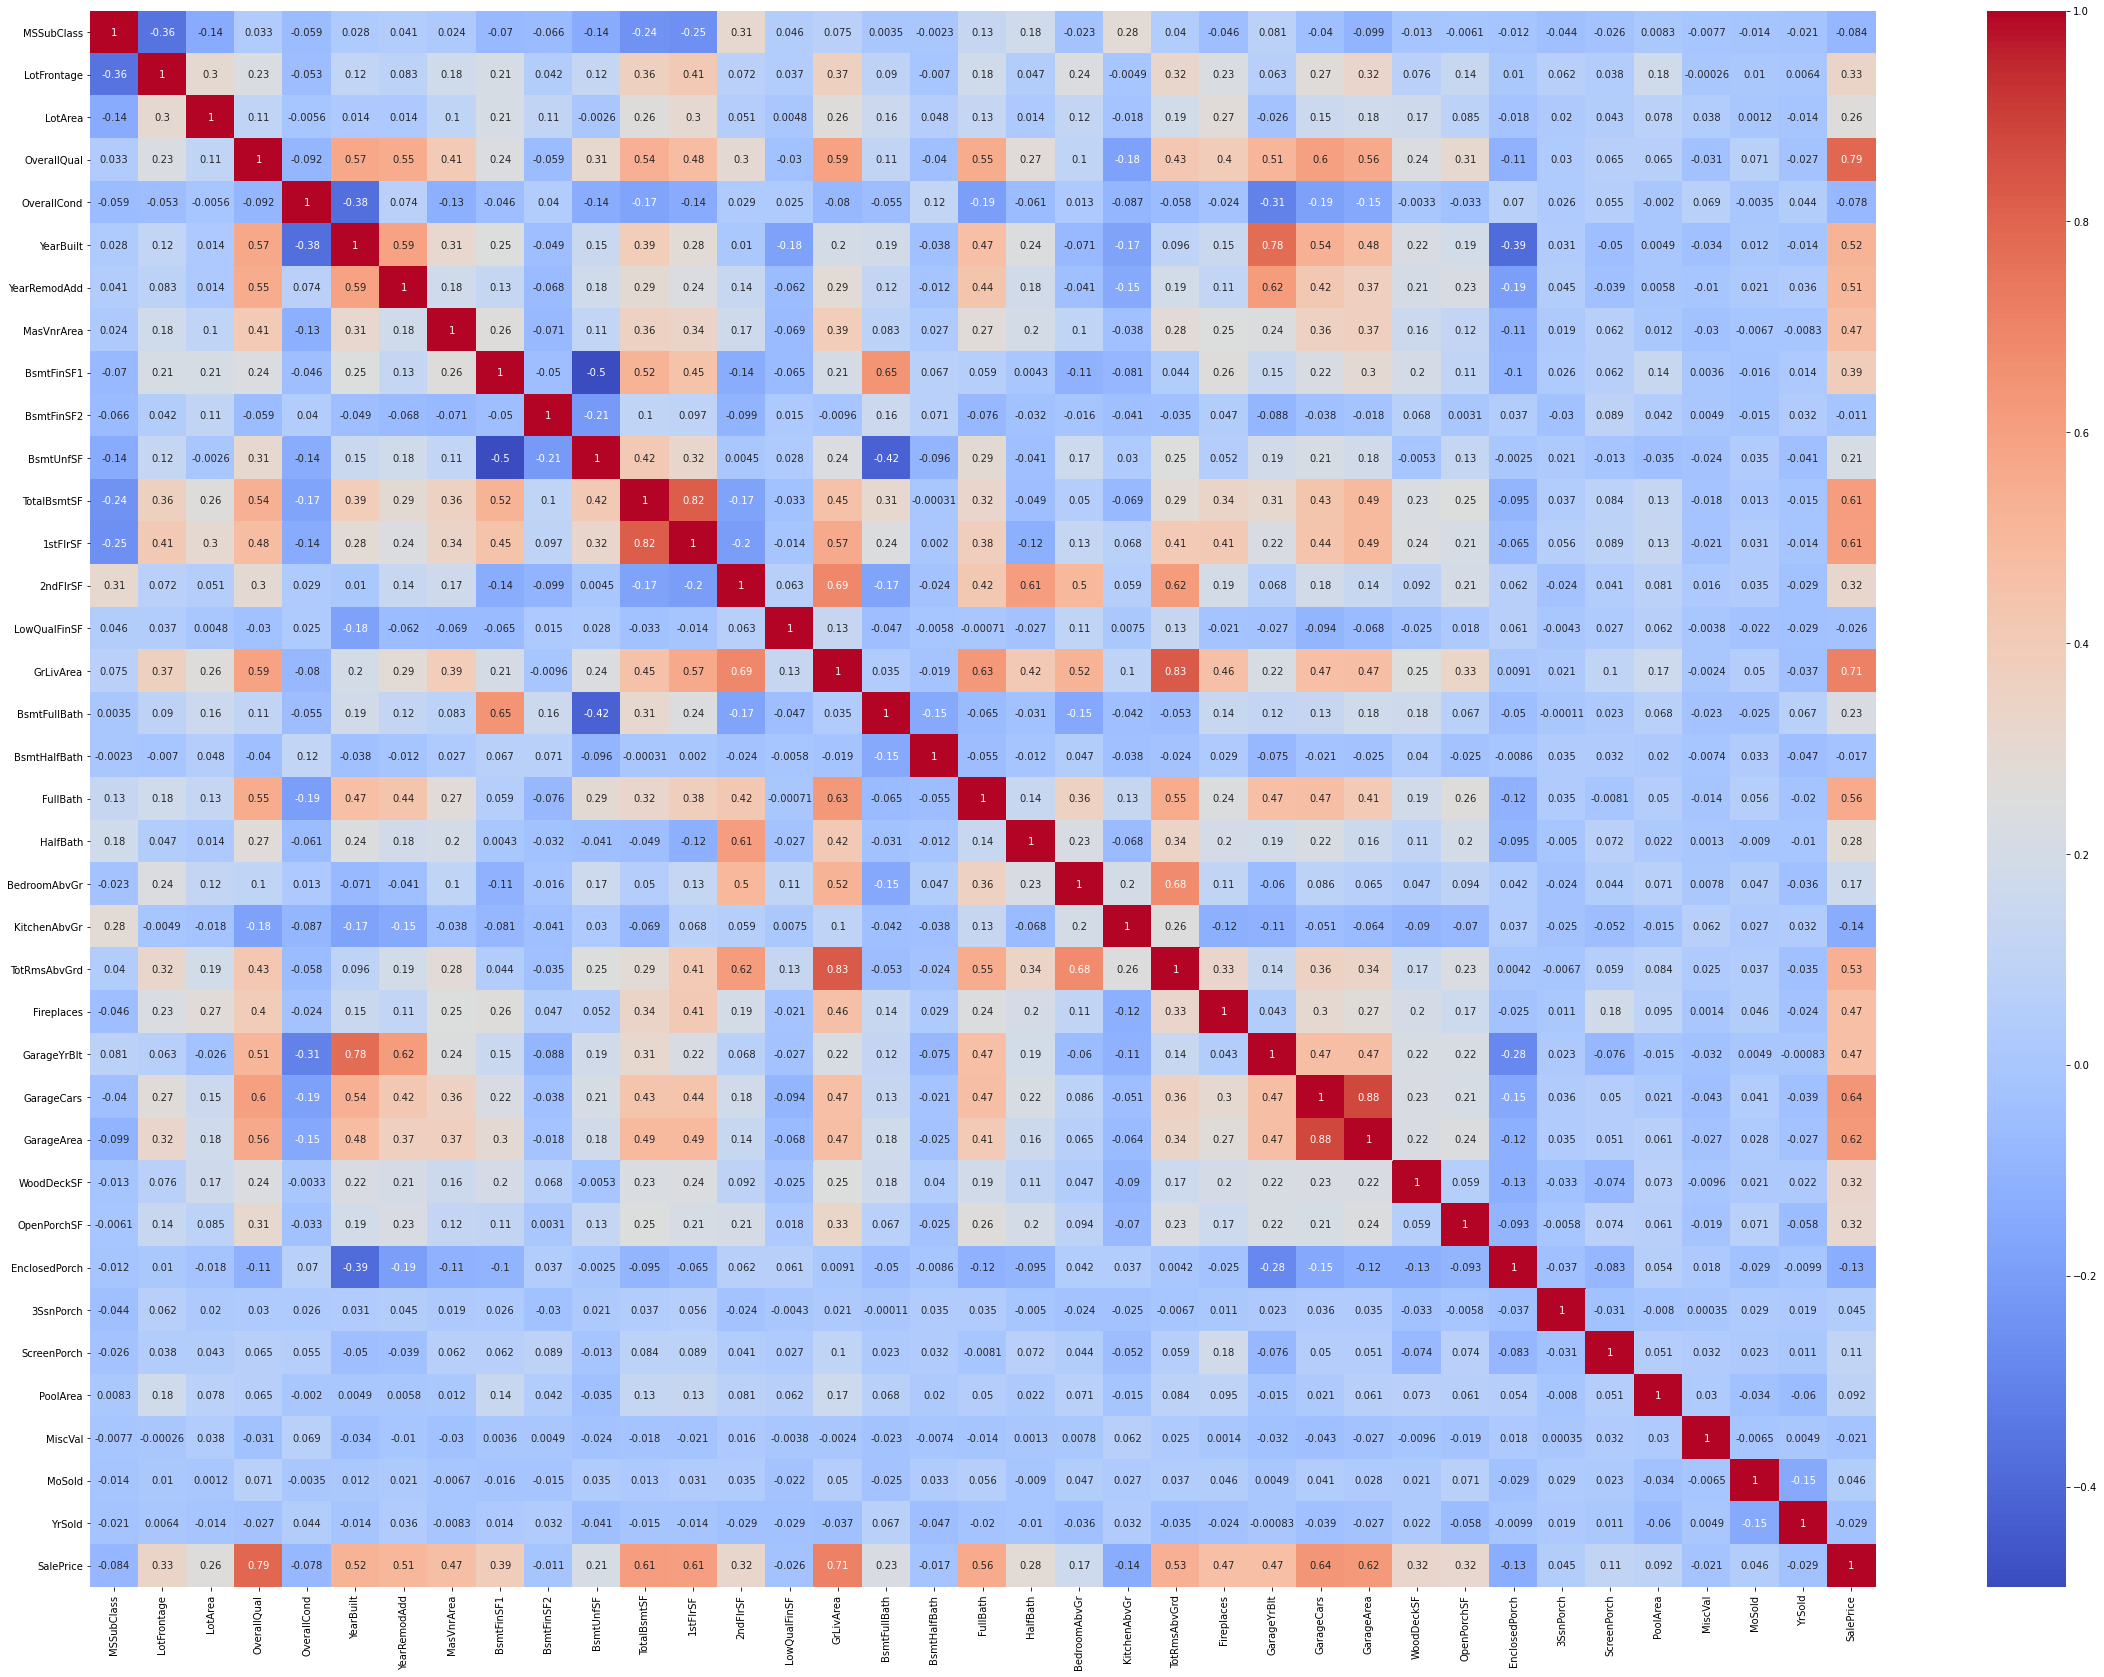

In [24]:
# Heatmap to check the Correlation of predictor variables with target variables
plt.figure(figsize=(40,29))
sns.heatmap(data = df.corr(), cmap="coolwarm", annot=True,  fmt='.2g' )
plt.show()

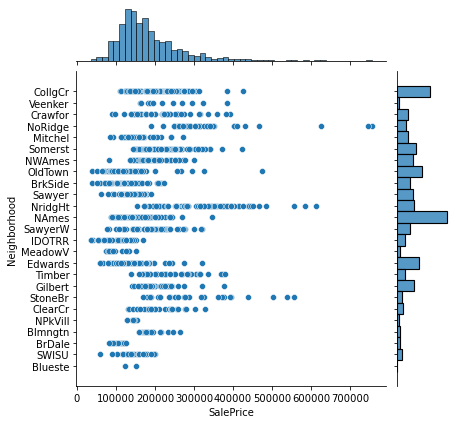

In [25]:
# Joint plot to check the Spread of the a predictor column with target column
sns.jointplot(data=df,x='SalePrice',y='Neighborhood')
plt.show()

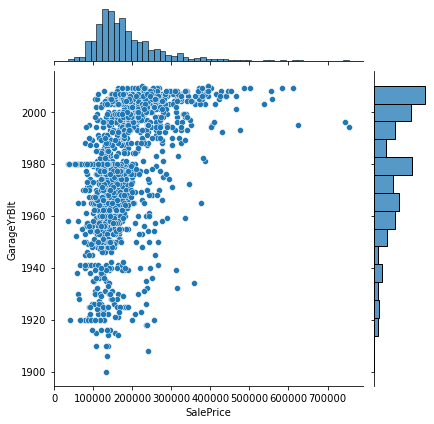

In [26]:
# Joint plot to check the Spread of the a predictor column with target column
sns.jointplot(data=df,x='SalePrice',y='GarageYrBlt')
plt.show()

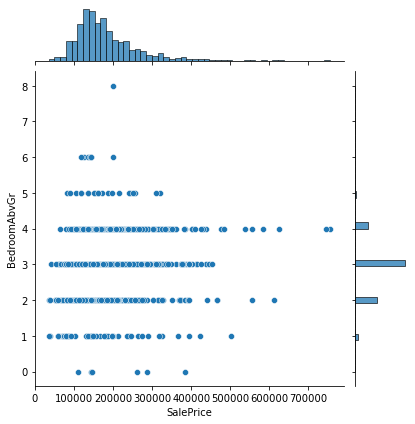

In [27]:
# Joint plot to check the Spread of the a predictor column with target column
sns.jointplot(data=df,x='SalePrice',y='BedroomAbvGr')
plt.show()

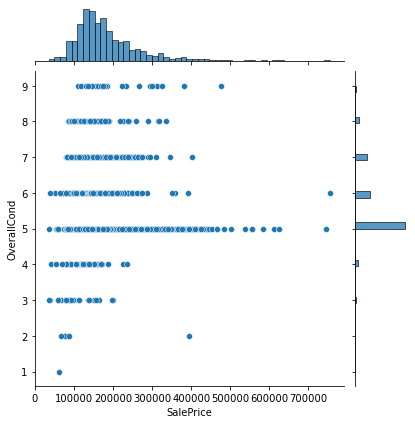

In [28]:
# Joint plot to check the Spread of the a predictor column with target column
sns.jointplot(data=df,x='SalePrice',y='OverallCond')
plt.show()

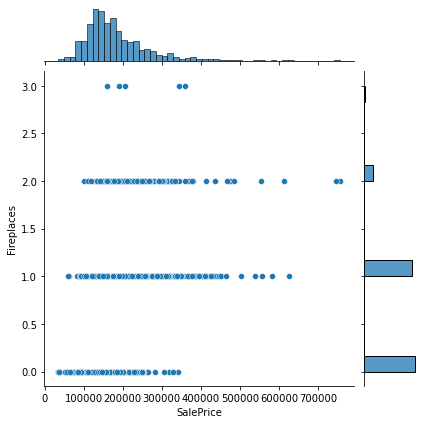

In [29]:
# Joint plot to check the Spread of the a predictor column with target column
sns.jointplot(data=df,x='SalePrice',y='Fireplaces')
plt.show()

In [30]:
# Deriving another column called 'PropertyAge' using YrSold and YearBuilt
df['PropertyAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000,8


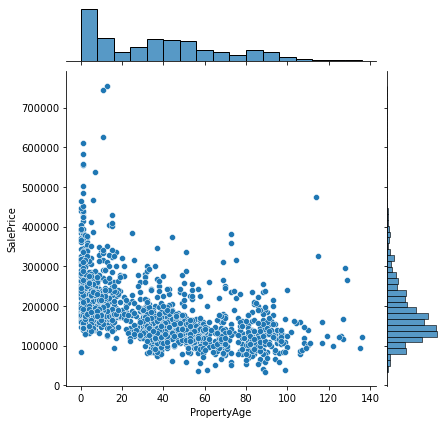

In [31]:

sns.jointplot(data=df, x='PropertyAge' , y='SalePrice')
plt.show()

In [32]:
# Dropping Redundant and Unimportant Variables
df = df.drop(['MoSold','YrSold','YearBuilt','GarageYrBlt'], axis=1)

In [33]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [34]:
# Checking for Variance of the Variables. Any variable which doesnt have much variance can be dropped.
val = ['Street','Utilities','Condition2','RoofMatl','Heating','GarageQual','GarageCond','3SsnPorch','ScreenPorch','PoolArea','EnclosedPorch']
for i in val:
    print(df[i].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
0      1436
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64
0      1344
192       6
1

In [35]:
#Dropping those variables which are having Low variance as seen above
df=df.drop(val, axis=1)
df.shape

(1460, 63)

In [36]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscVal,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,Y,0,61,NaN,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,NaN,0,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,NaN,0,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,NaN,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,NaN,0,WD,Normal,250000,8


# Step 3 : Model Building

In [37]:
# We need to Binary Encode the Numerical variables which are not continuous to create dummy variables. Columns OverallQual
# OverallCond, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars
# have been Binary Encoded.
df[['OverallQual']] = df[['OverallQual']].apply(lambda x: x.map({1:'Rating1',2:'Rating2',3:'Rating3',4:'Rating4',5:'Rating5',6:'Rating6',7:'Rating7',8:'Rating8',9:'Rating9',10:'Rating10'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscVal,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,Y,0,61,NaN,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,8,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,NaN,0,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,NaN,0,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,NaN,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,NaN,0,WD,Normal,250000,8


In [38]:
df[['OverallCond']] = df[['OverallCond']].apply(lambda x:x.map({1:'Rating1',2:'Rating2',3:'Rating3',4:'Rating4',5:'Rating5',6:'Rating6',7:'Rating7',8:'Rating8',9:'Rating9',10:'Rating10'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscVal,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,Y,0,61,NaN,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,NaN,0,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,NaN,0,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,NaN,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,NaN,0,WD,Normal,250000,8


In [39]:
# Next, we will convert those variables which we have done Binary encoding and other variables to convert them into dummy variables
df = pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MiscVal,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,208500,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0

In [40]:
# We will use MinMaxScaler to scale the data.
var_list=['MSSubClass','LotFrontage','LotArea','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice','PropertyAge']
scaler = MinMaxScaler()
df[var_list] = scaler.fit_transform(df[var_list])
df.describe()

,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MiscVal,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000

In [41]:
df.shape

(1460, 219)

In [42]:
# We get X and y values from df to build the model.
X = df.drop('SalePrice',axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MiscVal,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,1,0,2,1,3,1,8,0,2,0.386460,0.000000,0.111517,0,0.036765,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,

In [43]:
y = df['SalePrice']
y.head()

0    0.241078
1    0.203583
2    0.261908
3    0.145952
4    0.298709
Name: SalePrice, dtype: float64

In [44]:
# Using Train test split func to split the df data into 70-30.
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [45]:
X_train.shape

(1021, 218)

In [46]:
X_test.shape

(439, 218)

In [47]:
# Building and fitting Linear Regression model to X and y.
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
# We will optionally build a Normal Linear Regression Model using RFE 
# Building RFE with n=100 values and fitting the data with training data. 

rfe = RFE(lr, n_features_to_select=100)

In [50]:
rfe = rfe.fit(X_train,y_train)

In [51]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('MSSubClass', False, 15),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 34),
 ('FullBath', False, 23),
 ('HalfBath', False, 105),
 ('BedroomAbvGr', False, 114),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 107),
 ('Fireplaces', False, 44),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 46),
 ('MiscVal', False, 116),
 ('PropertyAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 45),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 94),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_

In [52]:
# All variables/columns which were not selected by RFE
val = X_train.columns[~rfe.support_]

In [53]:
# Building Normal Linear Regression Model
var_list = X_train.columns[rfe.support_]
X_train_lm = X_train[var_list]
X_train_lm_sm = sm.add_constant(X_train_lm)
X_train_lm_sm.head()

,const,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,KitchenAbvGr,GarageCars,GarageArea,WoodDeckSF,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_FR2,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Mitchel,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAn,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_ImStucc,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_ImStucc,Exterior2nd_Stone,Exterior2nd_Stucco,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_Slab,Foundation_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtFinType1_Unf,BsmtFinType2_BLQ,HeatingQC_Po,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Mod,Functional_Sev,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleCondition_AdjLand,SaleCondition_Partial
318,1.0,0.236301,0.040197,0.716667,0.16,0.174876,0.000000,0.154110,0.220458,0.238183,0.616949,0.0,0.435569,1,3,0.462623,0.396733,0.117647,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
239,1.0,0.106164,0.034780,0.000000,0.00,0.016655,0.000000,0.274401,0.120295,0.106471,0.333656,0.0,0.217219,1,1,0.155148,0.000000,0.477941,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
986,1.0,0.130137,0.018743,0.883333,0.00,0.000000,0.000000,0.207620,0.079378,0.153052,0.307022,0.0,0.245102,1,1,0.179831,0.459743,0.705882,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1416,1.0,0.133562,0.046928,0.000000,0.00,0.000000,0.000000,0.332620,0.127169,0.209270,0.505569,0.0,0.368500,2,2,0.394922,0.000000,0.919118,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
390,1.0,0.099315,0.033209,0.000000,0.00,0.042700,0.265265,0.098031,0.140917,0.143873,0.196610,0.0,0.194612,1,1,0.270804,0.000000,0.794118,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [54]:
#Summary of Normal Regression Model
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     80.62
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:40:02   Log-Likelihood:                 1933.5
No. Observations:                1021   AIC:                            -3679.
Df Residuals:                     927   BIC:                            -3216.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0962      0.034      2.861      0.004       0.030       0.162
LotFrontage              -0.0601      0.023     -2.608      0.009      -0.105      -0.015
LotArea                   0.1486      0.032      4.671      0.000       0.086       0.211
YearRemodAdd              0.0148      0.006      2.546      0.011       0.003       0.026
MasVnrArea                0.0143      0.013      1.102      0.271      -0.011       0.040
BsmtFinSF1                0.0348      0.021      1.686      0.092      -0.006       0.075
BsmtFinSF2                0.0189      0.012      1.560      0.119      -0.005       0.043
BsmtUnfSF                 0.0125      0.011      1.160      0.246      -0.009       0.034
TotalBsmtSF               0.0415      0.022      1.911      0.056      -0.001       0.084
1stFlrSF                  0.1324      0.021      6.416      0.000       0.092       0.173
2ndFlrSF                  0.1411      0.015      9.542      0.000       0.112       0.170
LowQualFinSF             -0.0008      0.018     -0.044      0.965      -0.036       0.034
GrLivArea                 0.1635      0.015     10.858      0.000       0.134       0.193
KitchenAbvGr             -0.0294      0.006     -4.539      0.000      -0.042      -0.017
GarageCars                0.0210      0.004      5.228      0.000       0.013       0.029
GarageArea               -0.0399      0.020     -1.972      0.049      -0.080      -0.000
WoodDeckSF                0.0137      0.009      1.441      0.150      -0.005       0.032
PropertyAge              -0.0711      0.014     -5.263      0.000      -0.098      -0.045
MSZoning_FV               0.0352      0.020      1.737      0.083      -0.005       0.075
MSZoning_RH               0.0503      0.020      2.482      0.013       0.011       0.090
MSZoning_RL               0.0454      0.016      2.753      0.006       0.013       0.078
MSZoning_RM               0.0422      0.016      2.570      0.010       0.010       0.074
LotShape_IR3             -0.0326      0.015     -2.199      0.028      -0.062      -0.004
LandContour_HLS           0.0265      0.010      2.727      0.007       0.007       0.046
LandContour_Low           0.0407      0.011      3.786      0.000       0.020       0.062
LandContour_Lvl           0.0315      0.007      4.670      0.000       0.018       0.045
LotConfig_FR2            -0.0167      0.007     -2.286      0.023      -0.031      -0.002
Neighborhood_Crawfor      0.0494      0.008      6.286      0.000       0.034       0.065
Neighborhood_Edwards     -0.0254      0.005     -4.738      0.000      -0.036      -0.015
Neighborhood_Mitchel     -0.0144      0.007     -2.068      0.039      -0.028      -0.001
Neighborhood_NoRidge      0.0672      0.008      8.180      0.000       0.051       0.083
Neighborhood_NridgHt   

In [55]:
# Residual Analysis.
y_train_pred = lm_model.predict(X_train_lm_sm)
res = y_train - y_train_pred
res.head()

318    -0.118317
239    -0.005343
986    -0.007395
1416   -0.013414
390     0.032219
dtype: float64

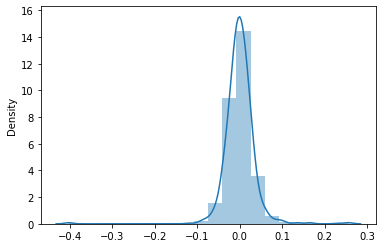

In [56]:
#distplot for residual Analysis
sns.distplot(res,bins=20)
plt.show()

In [57]:
X_test.describe()

,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MiscVal,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.00000

In [58]:
X_test.shape

(439, 218)

In [59]:
# Lets test the model that we built to test data.
X_test = X_test.drop(val, axis=1)
X_test.shape

(439, 100)

In [60]:
X_test_sm = sm.add_constant(X_test)
y_pred = lm_model.predict(X_test_sm)
r_squared_test =round(r2_score(y_test,y_pred), 4)
print(r_squared_test)

0.8578


# R2 Score of train and test data is looking pretty good. Lets move to Polynomial regression.

# Step 4 : Polynomial Regression

In [61]:
# Building a Polynomial model
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [62]:
# Train test split the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [63]:
# We will build a Polynomial model with degree 2. Degree 2 was found by trial and error method. We will use PolynomialFeatures
# function to Fit and transform the Training data. Then, we will fit that model to Linear regression model and get the model ready.
degree=2
polyreg = PolynomialFeatures(degree)
X_poly = polyreg.fit_transform(X_train)
linreg = LinearRegression()
linreg.fit(X_poly, y_train)

LinearRegression()

In [64]:
y_pred_train = linreg.predict(polyreg.fit_transform(X_train))
print(r2_score(y_train,y_pred_train))

0.9999955929751811


#Value of 0.999 denotes a over fitted model. Now, we can move to Ridge and lasso regression to make the model better.

In [65]:
# Metrics to assess model performance
rss = np.sum(np.square(y_train - y_pred_train))
print(rss)
mse = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse = mse**0.5
print(rmse)

5.4238404952360176e-05
5.3122825614456585e-08
0.00023048389447954186


# Step 5 : Ridge and Lasso Regression

In [66]:
# lambdas = [0,0.001,0.01,0.1,1,10,100,1000]
# for i in lambdas:
#     degree = 2
#     ridgecoef = PolynomialFeatures(degree)
#     X_poly = ridgecoef.fit_transform(X_train)
#     ridgereg = Ridge(alpha = i)
#     ridgereg.fit(X_poly, y_train)
#     y_pred_train = ridgereg.predict(ridgecoef.fit_transform(X_train))
#     print("r2 score = " + str(r2_score(y_train, y_pred_train)))
#     print(ridgereg.coef_)
    

In [67]:
#Cross Validation
# Ridge Regression

# We will use GridSearchCV to find the best/optimal Lamda/Alpha values for Ridge Regression.

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# As we can see, the function has determined 0.9 as the optimal Lambda value. We will use the same to build a Ridge Regression Model.
print(model_cv.best_params_)

{'alpha': 6.0}


In [69]:
# using Alpha as 6.0,we will build a Ridge Regression model for training data.
alpha = 6.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.00034697e-02 -5.31159602e-03  2.34088553e-02  1.30718757e-02
  2.69047911e-02  1.44726120e-02  1.56553484e-02  2.06714108e-02
  2.50487433e-02  4.00193208e-02  6.27563807e-02 -6.82586989e-03
  5.65357439e-02  1.39020954e-02  5.59008981e-03  2.01317522e-02
  8.48767732e-03 -7.65615297e-05 -2.46884295e-02  7.06471706e-03
  1.29243010e-02  1.73281504e-02  4.88770935e-03  1.54186027e-02
 -2.31838279e-04  1.18360618e-07 -1.18239672e-02  7.70323933e-03
  1.04185626e-02  9.38503747e-03  7.68725852e-03  6.80445039e-03
 -1.12500846e-02 -1.28232787e-04  1.39824685e-02  1.94343211e-02
  1.97559711e-02  1.26409965e-02 -1.58293111e-02 -4.10563098e-03
 -3.87153632e-03  7.84942020e-03  4.91470012e-03 -3.99731186e-03
 -2.64776192e-03 -4.20524935e-03  6.67386732e-03 -4.62732983e-03
  3.12118548e-02 -2.79480412e-02 -8.93322302e-03 -1.43867234e-02
 -1.02146560e-02 -1.58369167e-02 -1.06020819e-02 -2.26167773e-03
 -8.30822821e-03  5.65867431e-02  3.04062370e-02 -1.47565512e-02
  4.49094286e-03 -1.11148

In [70]:
# Now using Predict, we can predict the y_pred value for both training and test and check the R2_score.

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.8876557446287542
0.8670341069458426


# As we can see, We are getting an training R2_score of 0.8876 and Testing R2_score of 0.8670 from Ridge Regression.¶

In [71]:
# Now we can check the Coefficients.
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model = list(zip(cols, model_parameters))
parameters = pd.DataFrame(model)
parameters.columns = ['Variable', 'Coeff']
parameters.sort_values(ascending=False, by='Coeff')

,Variable,Coeff
87,OverallQual_Rating10,0.065
11,2ndFlrSF,0.063
0,constant,0.062
13,GrLivArea,0.057
58,Neighborhood_NoRidge,0.057
95,OverallQual_Rating9,0.049
10,1stFlrSF,0.040
49,Neighborhood_Crawfor,0.031
59,Neighborhood_NridgHt,0.030
159,BsmtExposure_Gd,0.028


# We can see that OverallQual_Rating10,2ndFlrSF,GrLivArea are the top 3 positively affecting variables and  KitchenQual_Gd	,Neighborhood_Edwards,BsmtQual_Gd  are the top 3 negatively affecting variables according to Ridge Regression.¶

# Lasso

In [72]:
# lamdas = [0.00001,0.0001,.001,.01,.1,1]
# for i in lambdas:
#     degree = 2
#     lassocoef = PolynomialFeatures(degree)
#     X_poly = lassocoef.fit_transform(X_train)
#     lassoreg = Lasso(alpha = i)
#     lassoreg.fit(X_poly,y_train)
#     print("r2score = " + str(r2_score(y_test,y_pred)))
#     print(lassoreg.coef_)

In [73]:
# Lasso Regression

# We will use GridSearchCV to find the best/optimal Lamda/Alpha values for Lasso Regression.
#Cross Validation
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 6
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)


Fitting 6 folds for each of 28 candidates, totalling 168 fits


GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# As we can see, the function has determined 0.9 as the optimal Lambda value. We will use the same to build a Lasso Regression Model.
print(model_cv.best_params_)

{'alpha': 0.0001}


In [75]:
# Building an Lasso Regression Model.
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-2.47160677e-02 -7.80479872e-03  3.91222062e-02  1.14153115e-02
  1.34524752e-02  0.00000000e+00  6.83596879e-03  1.17534947e-02
  0.00000000e+00  0.00000000e+00  5.43330700e-02 -7.27245423e-03
  2.60415788e-01  1.40708490e-02  5.38161000e-03  1.28281580e-02
  3.17301327e-03  0.00000000e+00 -2.49930899e-02  2.45445042e-03
  7.19939611e-03  1.54342156e-02 -0.00000000e+00  1.04393332e-02
 -7.30621137e-04  5.69120774e-07 -2.12443974e-02  0.00000000e+00
  1.80831236e-03  4.47989455e-03  0.00000000e+00  6.48124672e-03
 -9.79920110e-03  3.65261314e-04  1.46602163e-02  2.45904254e-02
  2.25398209e-02  1.31758543e-02 -1.09076780e-02 -0.00000000e+00
 -1.36064851e-03  5.02229131e-03  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  9.84111814e-03  1.86050572e-04
  3.96189852e-02 -2.54038396e-02 -0.00000000e+00 -8.90772962e-03
 -0.00000000e+00 -1.02414178e-02 -6.98551080e-03  0.00000000e+00
 -0.00000000e+00  6.23142087e-02  3.73177420e-02 -1.02256380e-02
  3.09378661e-04 -8.11348

In [76]:
# Now using Predict, we can predict the y_pred value for both training and test and check the R2_score.
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.8917969229187854
0.868498930816368


# As we can see, We are getting an training R2_score of 0.8917 and Testing R2_score of 0.8648 from Lasso Regression.

In [77]:
# Now we can check the Coefficients.
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model = list(zip(cols, model_parameters))
parameters = pd.DataFrame(model)
parameters.columns = ['Variable', 'Coeff']
parameters.sort_values(ascending=False, by='Coeff')

,Variable,Coeff
13,GrLivArea,0.260
87,OverallQual_Rating10,0.118
95,OverallQual_Rating9,0.096
58,Neighborhood_NoRidge,0.062
11,2ndFlrSF,0.054
94,OverallQual_Rating8,0.043
0,constant,0.042
49,Neighborhood_Crawfor,0.040
3,LotArea,0.039
59,Neighborhood_NridgHt,0.037


# We can see that GrLivArea, OverallQual_Rating10 and OverallQual_Rating9 are the top 3 positively affecting variables and Neighborhood_Edwards, KitchenQual_TA and Fireplaces_BsmtQual_Gd are the top 3 negatively affecting variables according to Ridge Regression.

In [78]:
# Lets check how the Lasso, Ridge and Linear model are different to eachother.

betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [79]:
betas

,Linear,Ridge,Lasso
MSSubClass,-1.686641e-02,-2.000347e-02,-2.471607e-02
LotFrontage,-6.696646e-02,-5.311596e-03,-7.804799e-03
LotArea,1.395922e-01,2.340886e-02,3.912221e-02
YearRemodAdd,5.307917e-03,1.307188e-02,1.141531e-02
MasVnrArea,1.842865e-02,2.690479e-02,1.345248e-02
BsmtFinSF1,-4.273329e-03,1.447261e-02,0.000000e+00
BsmtFinSF2,3.607218e-02,1.565535e-02,6.835969e-03
BsmtUnfSF,1.545608e-02,2.067141e-02,1.175349e-02
TotalBsmtSF,1.066401e-02,2.504874e-02,0.000000e+00
1stFlrSF,1.222639e-01,4.001932e-02,0.000000e+00


# As we can see, both Ridge and Lasso Model have similar/ near R2_Score for testing and training data. But we can select Lasso model as the better model as it not only gives a better testing R2_score, it also has feature selection due to which it removes(Makes Coeff value 0) insignificant columns and this leads to a simpler and less complex model which as we have is good then having a Overly complex model.